# Chap05 - 오히려 큰 손해를 보시겠습니까?

# Would you rather lose an arm or a leg?

## 5.1 서론

> 어느 기상학자가 허리케인이	그가	사는	도시를	덮칠	확률을	예측하고	있다.	그는	95%	신뢰수준으로	허리케인이	
도시를	덮치지	않을	확률이	99~100%	사이라고	추정한다.	기상학자는	자신의	정확도에	매우	만족하며	재난	대피는	필요	없다고	시청에	권고하였다.	그러나	불행히도	허리케인은	도시를	덮쳤고,	도시는	물에	잠겼다.


> ***"정확하게 틀리는 것보다 대강 맞는 것이 더 낫다."***

## 5.2 손실함수 - Loss Functions

손실함수(loss function)에 대해 알아보자. 손실함수는 진짜(true) 모수의 함수이며 그 모수의 추정치다.

$$
L(\theta, \hat{\theta} ) = f(\theta, \hat{\theta})
$$

손실함수에서 중요한 점은 현재 추정치가 얼마나 나쁜지를 측정한다는 것이다. 손실함수의 값이 클수록, 추정치는 손실함수에 따라 더 나빠진다. 일반적인 손실함수의 예로는 **제곱오차손실(squared-error loss)** 이다.

$$
L\left(\theta, \hat{\theta}\right) = \left( \theta - \hat{\theta} \right)^{2}
$$

또한, 다음과 같이 비대칭 제곱오차손실함수(asymmetric squared-error loss function)도 있다.

$$
L\left(\theta, \hat{\theta} \right)=\begin{cases} \left(\theta - \hat{\theta} \right)^{2} \quad \hat{\theta} < \theta \\ c\left( \theta - \hat{\theta} \right)^{2} \quad \hat{\theta} \ge \theta, 0<c<1  \end{cases}
$$

위의 식은 진짜 모수보다 큰 값을 추정하는 것이 작은 값을 추정하는 것보다 낫다는 것을 보여준다. 예를 들어, 다음 달의 웹 트래픽을 추정하려는 경우 사용할 수 있는데, 여유있게 예상하여 서버 자원이 부족하게 배치되는 것을 피할 수 있기 때문이다.

**절대손실**(absolute-loss)함수는 오차가 선형적으로 증가하는 손실함수이다. 

$$
L \left( \theta, \hat{\theta} \right) = \left| \theta - \hat{\theta} \right|
$$

이 외에 자주 사용되는 손실함수는 다음과 같다.

- $L(\theta, \hat{\theta}) = 1_{\hat{\theta} \neq \theta}$은 0-1 손실(zero-one loss)라고 한다. 기계학습 분류 알고리즘에서 종종 사용된다.
- $L(\theta, \hat{\theta}) = -\hat{\theta}\log(\theta) - (1 - \hat{\theta})\log(1-\theta), \hat{\theta} \in 0,1, \theta \in [0, 1]$은 로그 손실(log-loss)라고 하며 기계학습에 사용된다. 

손실함수는 (1) 수학적 용이성과 (2) 적용할 때 결과값이 크게 영향을 받지 않는다.

### 5.2.1 현실 세계에서의 손실함수

베이지안 추론에서는 추론하고자 하는 (진짜) 모수가 사전/사후확률분포를 가진 확률변수라고 생각한다. 사후확률분포에서 뽑은 값은 모수의 참값이 될 수 있는 가능성이 있는 값이다. 따라서, 이러한 사후확률분포에서 **기대손실**(expected loss)를 계산한다. 기대손실은 사후확률분포에서 얻은 표본 한 개에 주어진 손실보다 참(true)손실에 대해 더 정확하게 추정한다.

먼저, **베이지안 점추정**(Bayesian point estimate)을 알아보자. 사후확률분포에서 하나의 값으로 집약 시킨 것이 베이지안 점추정량이다.

만약, $P(\theta | X)$ 가 데이터 $X$를 관측한 후 $\theta$의 사후확률분포라면 다음 함수는 **모수 $\theta$ 에 대해 추정치 $\hat{\theta}$를 선택하는 기대손실** 이라고 할 수 있다.

$$
l(\hat{\theta}) = E_{\theta} \left[ L(\theta, \hat{\theta}) \right] 
$$

[4장 - 큰 수의 법칙](https://github.com/ExcelsiorCJH/Bayesian-with-Python/blob/master/Chap04-TheGreatestTheoremNeverTold/Chap04-TheGreatestTheoremNeverTold.ipynb)에서 배웠듯이 사후확률분포에서 나온 $N$개의 표본 $\theta_i$, $i = 1, \dots , N$과 손실함수 $L$이 주어졌을 때 추정치 $\hat{\theta}$를 사용하여 기대손실을 근사화할 수 있다.

$$
\frac{1}{N} \sum _{ i=1 }^{ N }{ L(\theta_i, \hat{\theta} } \approx E_{\theta} \left[ L(\theta, \hat{\theta}) \right] = l(\hat{\theta})
$$

### 5.2.2 예제: 'The Price Is Right' 쇼케이스 최적화

'The Price Is Right' 쇼의 규칙은 다음과 같다.

1. 두 참가자가 쇼케이스에서 겨루게 된다.
2. 각 참가자는 각각 다른 구성의 상품을 보게 된다.
3. 상품을 관찰한 뒤 참가자는 자신들 앞에 놓인 상품의 가격을 써낸다.
4. 써낸 가격이 실제 가격보다 높다면 그 참가자는 탈락한다.
5. 써낸 가격이 실제 가격보다 $250 이내라면 참가자는 승리하고 상품을 경
품으로 받는다.

여기서는 아래와 같이 간단하게 실제 가격이 정규확률분포를 따른다고 가정하자. 

$$
\text{실제 가격} \sim \text{Normal}(\mu_p, \sigma_p)
$$

$\mu_p = 35,000$, $\sigma_p = 7,500$이라 하고, 상품의 가격에 대한 우리의 믿음이 정규확률분포를 따른다고 가정해보자.

$$
\text{Prize}_i \sim \text{Normal}(\mu_i, \sigma_i), \quad i=1,2
$$

이제 베이지안 분석을 통해 모수 $\mu_i$를 통해 공정한 가격이 얼마인지 예상하고, 모수 $\sigma_i$로 예상 가격의 불확실성을 표시할 수 있다. 여기서는 두 상품을 관찰하고 이에 대한 믿음(?)분포를 가지고 있단느 조건 하에 새로 업데이트된 진짜 가격을 구하고 싶다. `PyMC`를 사용하여 이를 구해보자.

관측된 상품이 다음과 같다고 가정하자.

1. 토론토 여행(Toronto)
2. 제설기(snowblower)

우리는 이 상품의 진짜 가격을 추측하지만, 추측에 대해 확신하지는 못한다. 이런 불확실성을 정규분포의 모수를 사용하여 표시할 수 있다. 

$$
\text{snowblower} \sim \text{Normal}(3000, 500)
$$

$$
\text{Toronto} \sim \text{Normal}(12000, 3000)
$$

예를 들어 토론토 여행의 진짜 가격이 12,000 달러라고 믿고 있다고 하고, $[9000, 15000]$사이에 있을 확률이 68.2%라고 해보자.

In [1]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib
matplotlib.rc('font', family='NanumGothic')  # Linux
# matplotlib.rc('font', family='AppleGothic')  # Mac

import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

Text(0.5,0,'가격')

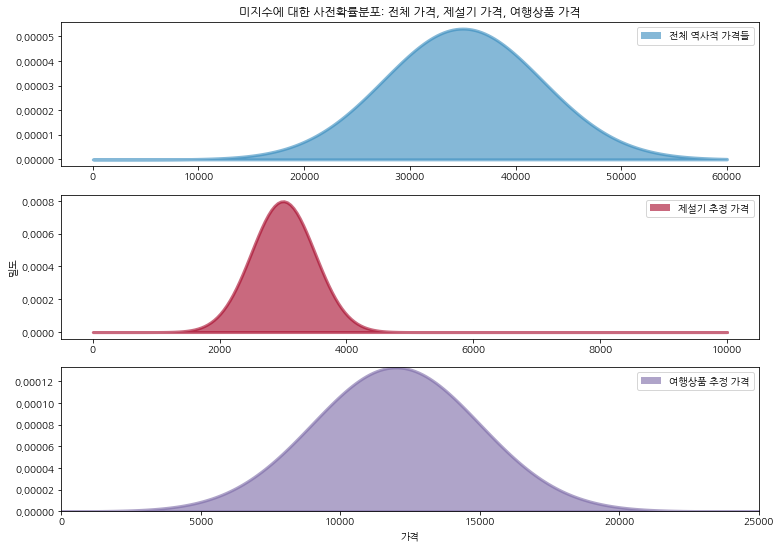

In [2]:
figsize(12.5, 9)
norm_pdf = stats.norm.pdf  # Normal Distribution

plt.subplot(311)
plt.title("미지수에 대한 사전확률분포: 전체 가격, 제설기 가격, 여행상품 가격");
x = np.linspace(0, 60000, 200)
sp1 = plt.fill_between(x, 0, norm_pdf(x, 35000, 7500),color="#348ABD", lw=3, alpha=0.6,
    label="전체 역사적 가격들")
p1 = plt.Rectangle((0, 0), 1, 1, fc=sp1.get_facecolor()[0])
plt.legend([p1], [sp1.get_label()])

plt.subplot(312)
x = np.linspace(0, 10000, 200)
sp2 = plt.fill_between(x, 0, norm_pdf(x, 3000, 500),
    color="#A60628", lw=3, alpha=0.6,
    label="제설기 추정 가격")
p2 = plt.Rectangle((0, 0), 1, 1, fc=sp2.get_facecolor()[0])
plt.legend([p2], [sp2.get_label()])
#plt.xlabel("가격")
plt.ylabel("밀도")
plt.subplot(313)

x = np.linspace(0, 25000, 200)
sp3 = plt.fill_between(x , 0, norm_pdf( x, 12000, 3000),color="#7A68A6", lw=3, alpha=0.6,
    label="여행상품 추정 가격")
plt.autoscale(tight=True)

p3 = plt.Rectangle((0, 0), 1, 1, fc=sp3.get_facecolor()[0])
plt.legend([p3], [sp3.get_label()])
plt.xlabel("가격")
#plt.ylabel("밀도")

In [3]:
import pymc as pm

In [4]:
data_mu = [3e3, 12e3]  # mu = [snowblower, toronto]
data_std = [5e2, 3e3]  # std = [snowblower, toronto]

mu_prior = 35e3  # 35000
std_prior = 75e2  # 7500
true_price = pm.Normal("true_price", mu_prior, 1.0 / std_prior ** 2)  # tau: precision

prize_1 = pm.Normal("first_prize", data_mu[0], 1.0 / data_std[0] ** 2)  # snowblower
prize_2 = pm.Normal("second_prize", data_mu[1], 1.0 / data_std[1] ** 2)  # toronto
price_estimate = prize_1 + prize_2

@pm.potential
def error(true_price=true_price, price_estimate=price_estimate):
    return pm.normal_like(true_price, price_estimate, 1 / (3e3) ** 2)

mcmc = pm.MCMC([true_price, prize_1, prize_2, price_estimate, error])
mcmc.sample(50000, 10000)

price_trace = mcmc.trace("true_price")[:]

 [-----------------100%-----------------] 50000 of 50000 complete in 8.4 sec

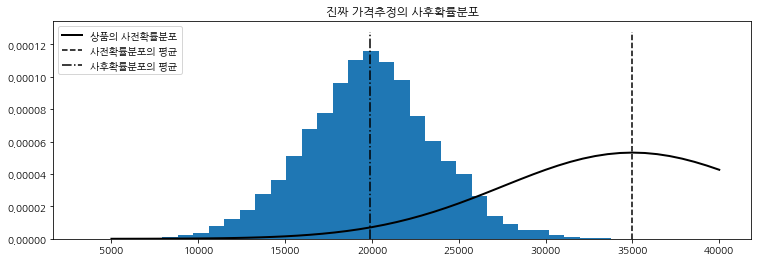

In [5]:
figsize(12.5, 4)
import scipy.stats as stats

# Plot the prior distribution.
# 사전확률분포를 Plotting한다.
x = np.linspace(5000, 40000)
plt.plot(x, stats.norm.pdf(x, 35000, 7500), c="k", lw=2,
    label="상품의 사전확률분포")

# Plot the posterior distribution, represented by samples from the MCMC.
# MCMC에서 얻은 표본이 대표하는 사후확률분포를 Plotting한다.
_hist = plt.hist(price_trace, bins=35, density=True, histtype="stepfilled")
plt.title("진짜 가격추정의 사후확률분포")
plt.vlines(mu_prior, 0, 1.1*np.max(_hist[0]), label="사전확률분포의 평균",
    linestyles="--")
plt.vlines(price_trace.mean(), 0, 1.1*np.max(_hist[0]), \
    label="사후확률분포의 평균", linestyles="-.")
plt.legend(loc="upper left");

여기에 손실함수를 사용하여 최고의 제시 가격(손실에 따른 **최상의**)을 구한다. 참가자의 손실함수는 다음과 같다고 할 수 있다.

```python

def showcase_loss(guess, true_price, risk=80000):
    if true_price < guess:
        return risk
    elif abs(true_price - guess) <= 250:
        return -2 * np.abs(true_price)
    else:
        return np.abs(true_price - guess - 250)
```

여기서 `risk`는 매개변수로서 우리의 추측이 진짜 가격보다 높을 경우 얼마나 나쁜지를 정의한다. `80000`이란 값은 교재의 저자가 임의로 정한것이다. 

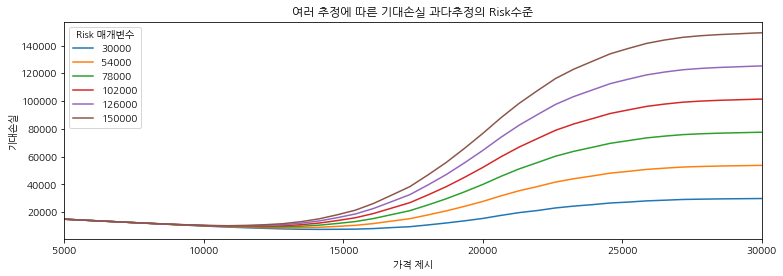

In [6]:
#figsize(12.5, 7)
# numpy friendly showdown_loss
# numpy 를 이용한 showdown_loss()함수

def showdown_loss(guess, true_price, risk=80000):
        loss = np.zeros_like(true_price)
        ix = true_price < guess
        loss[~ix] = np.abs(guess - true_price[~ix])
        close_mask = [abs(true_price - guess) <= 250]
        loss[close_mask] = -2 * true_price[close_mask]
        loss[ix] = risk
        return loss


guesses = np.linspace(5000, 50000, 70)
risks = np.linspace(30000, 150000, 6)
expected_loss = lambda guess, risk: showdown_loss(guess, price_trace, risk).mean()

for _p in risks:
    results = [expected_loss(_g, _p) for _g in guesses]
    plt.plot(guesses, results, label="%d" % _p)

plt.title("여러 추정에 따른 기대손실 과다추정의 Risk수준")
plt.legend(loc="upper left", title="Risk 매개변수")
plt.xlabel("가격 제시")
plt.ylabel("기대손실")
plt.xlim(5000, 30000);

#### 손실 최소화하기

기대손실을 최소화하는 추정치를 선택하는 것이 좋다. 위의 그림에서 이러한 추정치는 각 곡선의 최저점에 해당한다. 공식으로 보자면 다음 수식에 대한 해를 구하여 기대손실을 최소화 할 수 있다.

$$
\text{arg }\min _{ \hat{\theta} }{ E_{\theta} \left[ L(\theta, \hat{\theta}) \right] } 
$$

기대손실의 최소값을 **베이즈 추정치**(Bayes action)라고 한다. `SciPy`의 [`scipy.optimize.fmin`](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin.html) 함수를 사용하여 단변량 또는 다변량 함수의 최소값을 구할 수 있다.

minimum at risk 30000: 14395.21
minimum at risk 54000: 12972.71
minimum at risk 78000: 12324.11
minimum at risk 102000: 11081.85
minimum at risk 126000: 11081.85
minimum at risk 150000: 10949.05


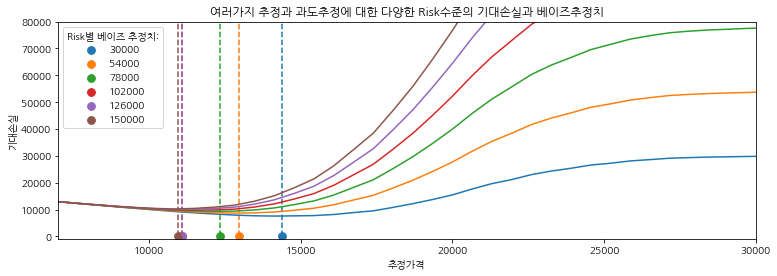

In [7]:
import scipy.optimize as sop

ax = plt.subplot(111)

for _p in risks:
    _color = next(ax._get_lines.prop_cycler)
    _min_results = sop.fmin(expected_loss, 15000, args=(_p,), disp=False)
    _results = [expected_loss(_g, _p) for _g in guesses]
    plt.plot(guesses, _results , color = _color['color'])
    plt.scatter(_min_results, 0, s = 60,color= _color['color'], label = "%d"%_p)
    plt.vlines(_min_results, 0, 120000, color = _color['color'], linestyles="--")
    print("minimum at risk %d: %.2f" % (_p, _min_results))

plt.title("여러가지 추정과 과도추정에 대한 다양한 Risk수준의 기대손실과 베이즈추정치")
plt.legend(loc="upper left", scatterpoints=1, title="Risk별 베이즈 추정치:")
plt.xlabel("추정가격")
plt.ylabel("기대손실")
plt.xlim(7000, 30000)
plt.ylim(-1000, 80000);

### 지름길

어떤 손실함수의 베이즈 추정치는 다음과 같이 구할 수 있다.

- 만약 평균제곱을 사용한다면 베이즈 추정치는 사후분포의 평균이다. 즉, $E_{\theta} [\theta]$ 값은 $E_{\theta}[(\theta - \hat{\theta})^{2}]를 최소화한 것이다. 
- 사후확률분포의 중앙값은 절대 손실 기대값을 최소화하고, 사후확률분포 표본의 중앙값 표본은 진짜 중앙값에 대해 정밀한 근사값이다.
- MAP 추정은 손실함수를 사용한 방법이다. 그 손실함수는 제로원(0-1) 손실이다.

## 5.3 베이지안 방법을 통한 기계학습

빈도주의 방법은 가능한 모든 모수에 대해 정확하려고 노력하는 반면, 기계학습은 가능한 모든 모수에서 최고의 **예측**을 얻으려고 한다. 

베이즈 추정치를 찾는 것은 **모수의 정확도**를 찾는 것이 아니라 **임의의 성과측정**을 최적화한 모수를 찾는 것과 같다. 

### 5.3.1 예제: 금융예측



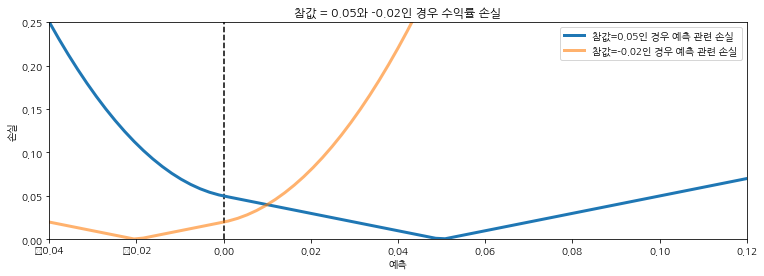

In [8]:
figsize(12.5, 4)

def stock_loss(true_return, yhat, alpha=100.):
    if true_return * yhat < 0:
        # true_return이 좋지 않으면 부호를 바꾼다.
        return alpha * yhat ** 2 - np.sign(true_return) * yhat + abs(true_return)
    else:
        return abs(true_return - yhat)
    
    
true_value = .05
pred = np.linspace(-.04, .12, 75)

plt.plot(pred, [stock_loss(true_value, _p) for _p in pred],label="참값=0.05인 경우 예측 관련 손실", lw=3)
plt.vlines(0, 0, .25, linestyles="--")

plt.xlabel("예측")
plt.ylabel("손실")
plt.xlim(-0.04, .12)
plt.ylim(0, 0.25)

true_value = -.02
plt.plot(pred, [stock_loss(true_value, _p) for _p in pred], alpha=0.6,label="참값=-0.02인 경우 예측 관련 손실", lw=3)
plt.legend()
plt.title("참값 = 0.05와 -0.02인 경우 수익률 손실");

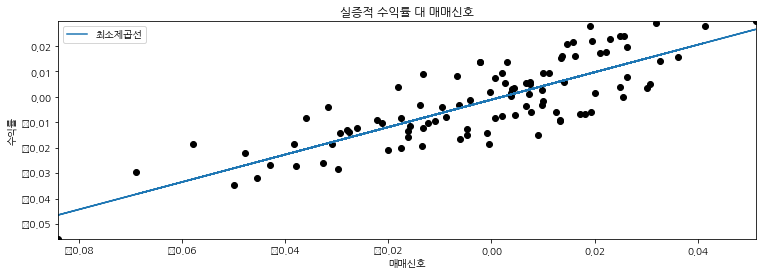

In [10]:
# Code to create artificial data
# 인위적 데이터를 만드는 코드
N = 100
X = 0.025 * np.random.randn(N)
Y = 0.5 * X + 0.01 * np.random.randn(N)

ls_coef_ = np.cov(X, Y)[0, 1] / np.var(X)
ls_intercept = Y.mean() - ls_coef_ * X.mean()

plt.scatter(X, Y, c="k")
plt.xlabel("매매신호")
plt.ylabel("수익률")
plt.title("실증적 수익률 대 매매신호")
plt.plot(X, ls_coef_ * X + ls_intercept, label="최소제곱선")
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())
plt.legend(loc="upper left");

위의 데이터셋에 대해 간단한 베이지안 선형회구를 수행한다. 모델은 다음과 같다.

$$
R = \alpha + \beta x + \epsilon
$$

여기서 $\alpha, \beta$는 미지의 모수이고, $\epsilon \sim \text{Normal}(0, 1/\tau)$이다. 

 [-----------------100%-----------------] 100000 of 100000 complete in 17.4 secPlotting alpha
Plotting beta
Plotting prec


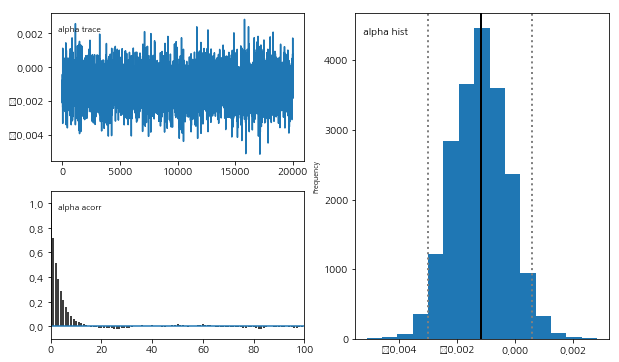

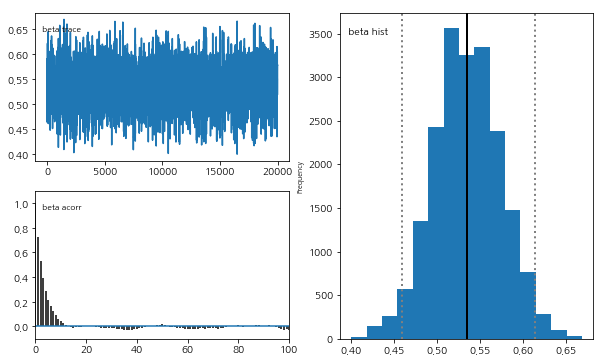

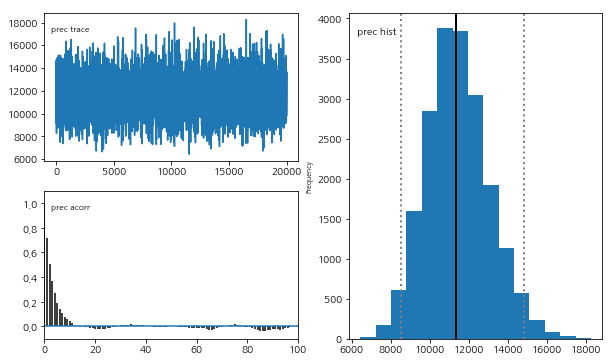

In [11]:
from pymc.Matplot import plot as mcplot

std = pm.Uniform("std", 0, 100, trace=False)  


@pm.deterministic
def prec(U=std):
    return 1.0 / (U) ** 2

beta = pm.Normal("beta", 0, 0.0001)
alpha = pm.Normal("alpha", 0, 0.0001)


@pm.deterministic
def mean(X=X, alpha=alpha, beta=beta):
    return alpha + beta * X

obs = pm.Normal("obs", mean, prec, value=Y, observed=True)
mcmc = pm.MCMC([obs, beta, alpha, std, prec])

mcmc.sample(100000, 80000)
mcplot(mcmc)

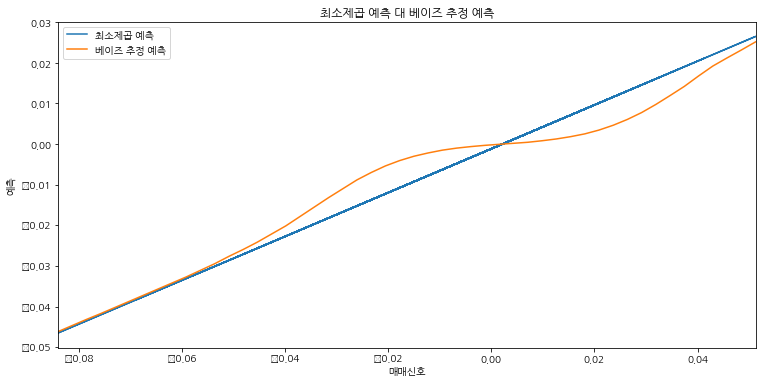

In [12]:

figsize(12.5, 6)
from scipy.optimize import fmin

def stock_loss(price, pred, coef=500):       
    sol = np.zeros_like(price)
    ix = price * pred < 0
    sol[ix] = coef * pred ** 2 - np.sign(price[ix]) * pred + abs(price[ix])
    sol[~ix] = abs(price[~ix] - pred)
    return sol

tau_samples = mcmc.trace("prec")[:]
alpha_samples = mcmc.trace("alpha")[:]
beta_samples = mcmc.trace("beta")[:]

N = tau_samples.shape[0]

noise = 1. / np.sqrt(tau_samples) * np.random.randn(N)

possible_outcomes = lambda signal: alpha_samples + beta_samples * signal + noise

opt_predictions = np.zeros(50)
trading_signals = np.linspace(X.min(), X.max(), 50)
for i, _signal in enumerate(trading_signals):
    _possible_outcomes = possible_outcomes(_signal)
    tomin = lambda pred: stock_loss(_possible_outcomes, pred).mean()
    opt_predictions[i] = fmin(tomin, 0, disp=False)

plt.xlabel("매매신호")
plt.ylabel("예측")
plt.title("최소제곱 예측 대 베이즈 추정 예측")
plt.plot(X, ls_coef_ * X + ls_intercept, label="최소제곱 예측")
plt.xlim(X.min(), X.max())
plt.plot(trading_signals, opt_predictions, label="베이즈 추정 예측")
plt.legend(loc="upper left");

### 5.3.2 예제: 캐글의 Observing Dark Worlds 콘테스트

> 우주는 눈에 보이는 게 전부가 아니다. 우주 밖에 있는 물질의 형태는 우리가 아는 것보다 약 7배 이상 많다. 그리
고 우리는 그것이 무엇인지도 모른다. 우리가 아는 것은 그 물질이 빛을 내거나 흡수하지 않는다는 것이다. 그래
서 그것을 암흑물질(dark matter)이라고 부른다.
그런 방대한 양이 모인 물질은 눈에 띄지 않을 수 없다. 사실 우리는 이런 물질이 모여 형성된 암흑물질 헤일로(D
ark Matter Halos)라고 불리는 거대한 구조체를 관측하는 것이다.
어둡긴 하지만 그것은 시공간을 왜곡하여 암흑물질 가까이 지나는 배경 은하(background galaxy)의 빛의 경
로를 바꿀 것이다. 이런 왜곡 때문에 은하계가 타원형으로 보인다.

1. 헤일로의 위치 $p(x)$에 대한 사전분포를 구성한다. 즉, 데이터를 찾기 전에 헤일로의 위치에 대한 우리의 기대를 공식화한다.
2. 암흑물질 헤일로의 위치가 주어졌을 때 데이터에 대한 확률론적 모델을 구성한다(은하의 타원율을 관측하여): $p(e|x)$.
3. 베이즈의 법칙을 사용하여 헤일로의 위치에 대한 사후분포를 얻는다. 즉, 데이터를 사용하여 암흑물질 헤일로가 있을 만한 곳을 짐작한다.
4. 헤일로의 위치($\hat{x} = \arg \min_{\text{prediction} } E_{p(x|e)}[ L( \text{prediction}, x) ]$) 예측에 대한 사후분포의 관점에서 기대손실을 최소화한다. 즉, 우리의 예측이 가능한 주어진 오차척도에 맞도록 좋게 조율하는 것이다.

### 5.3.3 데이터

데이터셋은 실제 300개의 개별 파일이며 각각은 천체(sky)를 나타낸다. 각 파일 또는 천체에는 300~720개의 은하(galaxy)가 있다. 각 은하는 x와 y 좌표를 가지고 있고 그 범위는 0~4,200 사이이며, 타원율(ellipticity) $e_1$과 $e_2$로 측정된다.

- https://www.kaggle.com/c/DarkWorlds/details/an-introduction-to-ellipticity

Data on galaxies in sky 3.
position_x, position_y, e_1, e_2 
[[  1.62690000e+02   1.60006000e+03   1.14664000e-01  -1.90326000e-01]
 [  2.27228000e+03   5.40040000e+02   6.23555000e-01   2.14979000e-01]
 [  3.55364000e+03   2.69771000e+03   2.83527000e-01  -3.01870000e-01]]


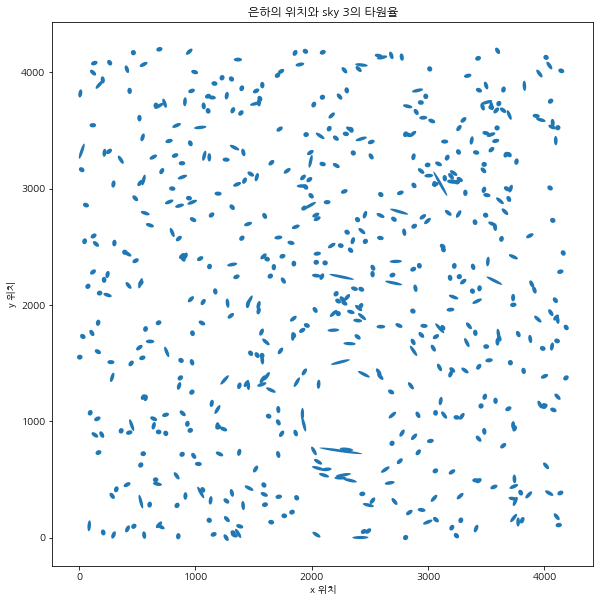

In [16]:
from draw_sky2 import draw_sky

#import numpy as np
n_sky = 3  # 확인할 파일을 지정한다 choose a file/sky to examine.
data = np.genfromtxt("data/Train_Skies/Train_Skies/Training_Sky%d.csv" % (n_sky),
                      dtype=None,
                      skip_header=1,
                      delimiter=",",
                      usecols=[1, 2, 3, 4])
print("Data on galaxies in sky %d." %n_sky)
print("position_x, position_y, e_1, e_2 ")
print(data[:3])

fig = draw_sky(data)
plt.title("은하의 위치와 sky %d의 타원율" %n_sky)
plt.xlabel("x 위치")
plt.ylabel("y 위치");

In [17]:
def euclidean_distance(x, y):
    return np.sqrt(((x - y) **2).sum(axis=1))
def f_distance(gxy_pos, halo_pos, c):
# foo_position should be a 2D numpy array.
# foo_position 은 2D numpy 배열이어야 한다
    return np.maximum(euclidean_distance(gxy_pos, halo_pos), c)[:,None]

def tangential_distance(glxy_position, halo_position):
# foo_position should be a 2D numpy array.
# foo_position 은 2D numpy 배열이어야 한다
    delta = glxy_position - halo_position
    t = (2*np.arctan(delta[:,1]/delta[:,0]))[:,None]
    return np.concatenate([-np.cos(t), -np.sin(t)], axis=1)

import pymc as pm

# Set the size of the halo’s mass.
# 할로 물질의 크기를 설정한다
mass_large = pm.Uniform("mass_large", 40, 180, trace=False)

# Set the initial prior position of the halos; it’s a 2D Uniform
# distribution.
# 할로의 최초 사전위치를 설정한다; 2차원 균등분포이다
halo_position = pm.Uniform("halo_position", 0, 4200, size=(1,2))

@pm.deterministic
def mean(mass=mass_large, h_pos=halo_position, glx_pos=data[:,:2]):
    return mass/f_distance(glx_pos, h_pos, 240)* tangential_distance(glx_pos, h_pos)
ellpty = pm.Normal("ellipticity", mean, 1./0.05, observed=True,value=data[:,2:] )
mcmc = pm.MCMC([ellpty, mean, halo_position, mass_large])
map_ = pm.MAP([ellpty, mean, halo_position, mass_large])
map_.fit()
mcmc.sample(200000, 140000, 3)

 [-----------------100%-----------------] 200000 of 200000 complete in 149.6 sec

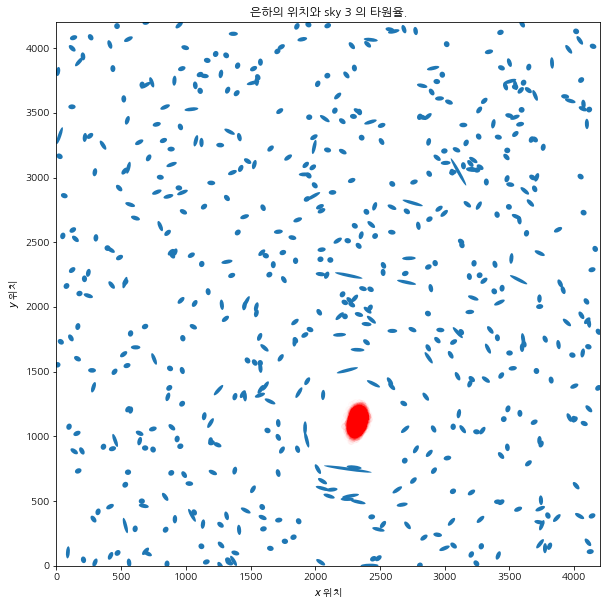

In [18]:
t = mcmc.trace("halo_position")[:].reshape( 20000,2)
fig = draw_sky(data)
plt.title("은하의 위치와 sky %d 의 타원율." %n_sky)
plt.xlabel("$x$ 위치")
plt.ylabel("$y$ 위치")
plt.scatter(t[:,0], t[:,1], alpha=0.015, c="r")
plt.xlim(0, 4200)
plt.ylim(0, 4200);

In [19]:
halo_data = np.genfromtxt("data/Training_halos.csv",
                          delimiter=",",
                          usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9],
                          skip_header=1)
print(halo_data[n_sky])

[  1.00000000e+00   1.40861000e+03   1.68586000e+03   1.40861000e+03
   1.68586000e+03   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00]


True halo location: 1408.61 1685.86


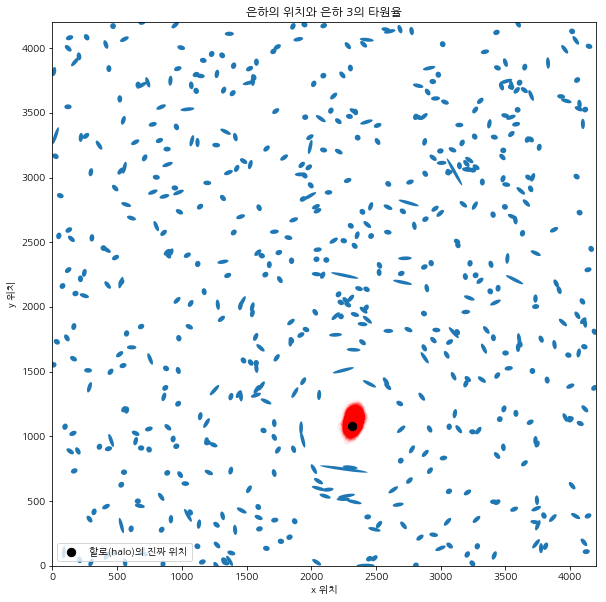

In [20]:
fig = draw_sky(data)
plt.title("은하의 위치와 은하 %d의 타원율" % n_sky)
plt.xlabel("x 위치")
plt.ylabel("y 위치")
plt.scatter(t[:, 0], t[:, 1], alpha=0.015, c="r")
plt.scatter(halo_data[n_sky - 1][3], halo_data[n_sky - 1][4],label="할로(halo)의 진짜 위치",c="k", s=70)
plt.legend(scatterpoints=1, loc="lower left")
plt.xlim(0, 4200)
plt.ylim(0, 4200);

print("True halo location:", halo_data[n_sky][3], halo_data[n_sky][4])

In [21]:
mean_posterior = t.mean(axis=0).reshape(1, 2)
print(mean_posterior)

[[ 2323.67915917  1122.63284611]]


In [22]:
from DarkWorldsMetric import main_score

_halo_data = halo_data[n_sky - 1]

nhalo_all = _halo_data[0].reshape(1, 1)
x_true_all = _halo_data[3].reshape(1, 1)
y_true_all = _halo_data[4].reshape(1, 1)
x_ref_all = _halo_data[1].reshape(1, 1)
y_ref_all = _halo_data[2].reshape(1, 1)
sky_prediction = mean_posterior

print("Using the mean:")
main_score(nhalo_all, x_true_all, y_true_all,x_ref_all, y_ref_all, sky_prediction)

print("\n")
# what's a bad score?
# 나쁜 점수는?
random_guess = np.random.randint(0, 4200, size=(1, 2))
print("Using a random location:", random_guess)
main_score(nhalo_all, x_true_all, y_true_all,x_ref_all, y_ref_all, random_guess)

Using the mean:
Your average distance in pixels you are away from the true halo is 41.4426191647
Your average angular vector is 1.0
Your score for the training data is 1.04144261916


Using a random location: [[2999 3216]]
Your average distance in pixels you are away from the true halo is 2240.74964485
Your average angular vector is 1.0
Your score for the training data is 3.24074964485


3.240749644851026

In [23]:
from pymc.Matplot import plot as mcplot


def halo_posteriors(n_halos_in_sky, galaxy_data,samples=5e5, burn_in=34e4, thin=4):
    # set the size of the halo's mass
    # 할로물질의 크기를 설정한다
    """
    exp_mass_large = pm.Uniform("exp_mass_large", 40, 180)
    @pm.deterministic
    def mass_large(exp_mass_large = exp_mass_large):
        return np.log(exp_mass_large)
    """

    mass_large = pm.Uniform("mass_large", 40, 180)

    mass_small_1 = 20
    mass_small_2 = 20

    masses = np.array([mass_large, mass_small_1, mass_small_2], dtype=object)

    # set the initial prior positions of the halos, it's a 2-d Uniform dist.
    # 할로의 초기 사전위치를 설정한다. 2차원 균등분포이다
    halo_positions = pm.Uniform("halo_positions", 0, 4200,size=(n_halos_in_sky, 2))  # 크기에 주목 notice this size

    fdist_constants = np.array([240, 70, 70])

    @pm.deterministic
    def mean(mass=masses, h_pos=halo_positions, glx_pos=data[:, :2],n_halos_in_sky=n_halos_in_sky):

        _sum = 0
        for i in range(n_halos_in_sky):
            _sum += mass[i] / f_distance(glx_pos, h_pos[i, :], fdist_constants[i]) * tangential_distance(glx_pos, h_pos[i, :])

        return _sum

    ellpty = pm.Normal("ellipcity", mean, 1. / 0.05, observed=True,value=data[:, 2:])

    map_ = pm.MAP([ellpty, mean, halo_positions, mass_large])
    map_.fit(method="fmin_powell")

    mcmc = pm.MCMC([ellpty, mean, halo_positions, mass_large])
    mcmc.sample(samples, burn_in, thin)
    return mcmc.trace("halo_positions")[:]

n_sky = 215
data = np.genfromtxt(r"data/Train_Skies/Train_Skies/Training_Sky%d.csv" % (n_sky),
    dtype=None,
    skip_header=1,
    delimiter=",",
    usecols=[1, 2, 3, 4])
# There are 3 halos in this file.
# 이 파일에는 3개의 할로가 있다
samples = 10.5e5
traces = halo_posteriors(3, data, samples=samples,
    burn_in=9.5e5, thin=10)

 [-----------------100%-----------------] 1050000 of 1050000 complete in 862.6 sec

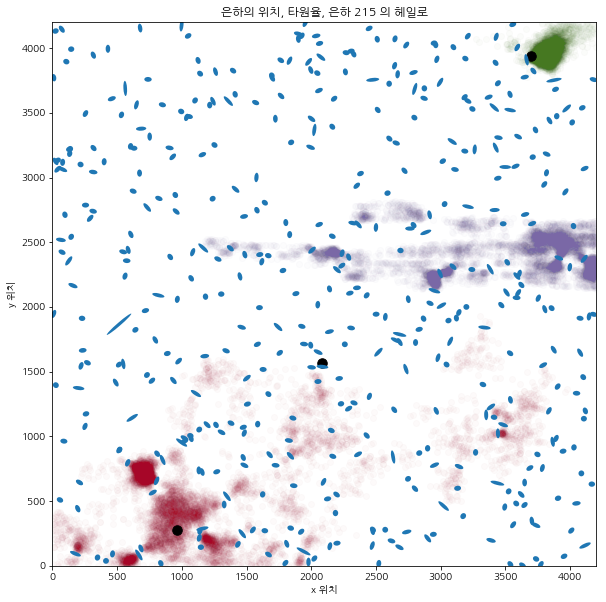

In [24]:
fig = draw_sky(data)
plt.title("은하의 위치, 타원율, 은하 %d 의 헤일로" % n_sky)
plt.xlabel("x 위치")
plt.ylabel("y 위치")

colors = ["#467821", "#A60628", "#7A68A6"]

for i in range(traces.shape[1]):
    plt.scatter(traces[:, i, 0], traces[:, i, 1], c=colors[i], alpha=0.02)

for i in range(traces.shape[1]):
    plt.scatter(halo_data[n_sky - 1][3 + 2 * i], halo_data[n_sky - 1][4 + 2 * i],
        label="할로의 진짜 위치", c="k", s=90)

# plt.legend(scatterpoints = 1)
plt.xlim(0, 4200)
plt.ylim(0, 4200);

In [25]:
_halo_data = halo_data[n_sky - 1]
print(traces.shape)

mean_posterior = traces.mean(axis=0).reshape(1, 6)
print(mean_posterior)

nhalo_all = _halo_data[0].reshape(1, 1)
x_true_all = _halo_data[3].reshape(1, 1)
y_true_all = _halo_data[4].reshape(1, 1)
x_ref_all = _halo_data[1].reshape(1, 1)
y_ref_all = _halo_data[2].reshape(1, 1)
sky_prediction = mean_posterior

print("Using the mean:")
main_score([1], x_true_all, y_true_all, x_ref_all, y_ref_all, sky_prediction)

# what's a bad score?
# 나쁜 점수는?
print("\n")
random_guess = np.random.randint(0, 4200, size=(1, 2))
print("Using a random location:", random_guess)
main_score([1], x_true_all, y_true_all, x_ref_all, y_ref_all, random_guess)

(10000, 3, 2)
[[ 3817.94626982  3961.30562288  1215.13342585   560.03588064
   3447.85810295  2398.03039033]]
Using the mean:
Your average distance in pixels you are away from the true halo is 123.025701551
Your average angular vector is 1.0
Your score for the training data is 1.12302570155


Using a random location: [[2766 3241]]
Your average distance in pixels you are away from the true halo is 1164.97281277
Your average angular vector is 1.0
Your score for the training data is 2.16497281277


2.1649728127728993